PRE-LECTURE QUESTIONS

QUESTION 1

A) Simple vs Multiple Linear Regression: 

Simple linear regression shows a linear relationship between two variables, the predictor and outcome variable.  Multiple linear regression can show the effects of multiple predictor variables simultaneously on the outcome variable.  This is more helpful, because there are often multiple variables that impact the outcome, and multiple linear regression accounts for this.  Simple linear regression is often TOO simple.

B) Continuous vs Indicator Variable for Simple Linear Regression:

When using a continuous predictor variable, this variable can take any value of x, not just one of several categories.  For indicator variables, we are looking at whether the value is or isn't in a specific category.  The equation for both is written as y=β0 
​
 +β1
​ 
 x+ϵ, where β0 is the intercept, β1 is the slope or correlation, x is the value of the predictor, and ϵ is the error term.  When using indicator variables, x is always either 0 or 1, depending on if x is in the category we're observing.  If yes, x=1, if no, x=0.
 
 C) Multiple Linear Regression
 
When using multiple linear regression with a continuous variable and an indicator variable as the predictors, the equation is written as the sum of the coefficients times their predictor variable, plus the intercept.  The equation is as follows: y=β0
​
+β1
​
x1
​
+β2
​
x2
​
+ϵ, where β0 is the intercept, β1 is the slope coefficent for the first predictor variable, β2 is the slope coeffiecent for the second predictor variable, x1 is the value of the first predictor variable, and x2 is the value of the 2nd predictor variable.  This equation can be written with as many predictor variables as needed, as long as this pattern is followed.  If a given predictor variable is an indicator variable, its value of x will always be either 0 or 1, meaning that the value times the slope coefficent for this variable will always either be 0 or the slope coefficent itself.

D) Effect of Interaction

We use an interaction between these variables when we think that the effect of the continuous variables depends on the category of the indicator variable.  It adds an extra term to the model, which is the product of these two values (continuous variable's value times either 1 or 0) times their own slope coefficent.  This equation is written as y=β0
​
 +β1
​
 x1
​
 +β2
​
 x2
​
 +β3
​
 (x1
​
 ×x2
​
 )+ϵ, where x1 * x2 is the result of these values being multiplied as described above, and β3 is their slope coefficient.  All the other variables are the same as listed in part C (above).
 
E) With Non-Binary Categorical Variables

This model is written as follows: y=β0
​
 +β1
​
 x1
​
 +β2
​
 x2
​
 +⋯+βk−1
​
 xk−1
​+ϵ, where all the variables are the same as described above, except βk−1 and x(k-1).  K is the number of categories, and this model only includes K-1 categories, with the Kth category used as a "baseline" which the others are compared to.  Each x is either 1 or 0, depending on if x is in the category being examined.  Because of the nature of this model, each x can only fall in one category, so all the other categories will equal 0 for any given x.  This means that the equation will simplify to the intercept + the slope coefficient for x's category, as everything else will equal 0.

QUESTION 2)

The predictor variables are the cost of the online ad campaign, and the cost of the TV ad campaign.  The outcome variable is the effectiveness/success of the advertising, likely based on how much sports equipment is sold.  The interaction of interest here is the relationship between the cost of the tv and online ad campaigns, and whether together they have a greater impact on the advertising's success.

Linear Form with interaction:  

y=β0​+β1​x1​+β2​x2​+β3​(x1​×x2​), where β0 is the intercept, β1 is the slope coefficient of cost of the the online ad campaign, β2 is the slope coefficent of the cost of the TV ad campaign, β3 is the slope coefficent of their interaction, x1 is the cost of the online campaign, and x2 is cost of the TV campaign.

Linear Form without interaction:

y=β0​+β1​x1​+β2​x2.  All these variables are the same as those listed for the linear form with interaction.

A) When using the model without the interaction, we predict that the outcome variable (y) will equal the intercept, plus the slope coefficient for the online ads times the amount spent on online ads, plus the slope coefficient for the TV ads times the amount spent on TV ads.  It takes into account both variables, but assumes that the effectiveness of each type of ad is independent from the amount spend on the other type.  On the other hand, when using the model WITH interaction, we take this relationship into account.  In this case, the prediction for the value of the outcome variable is the same as above, plus an extra term: the slope coefficient of the interaction times the product of the values of each variable (the amount spent on each type of ad).

B) If categorizing spending as either "high" or "low," rather than a continuous dollar amount, we would use the same models as above to predict the outcome variable's value, but x1 would be either 1 (for high online spending) or 0 (for low online spending), and x2 would be either 1 (for high TV spending) or 0 (for low TV spending).

QUESTION 3)

In [1]:
import pandas as pd
import statsmodels.formula.api as smf

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url).fillna('None')

pokeaman['str8fyre'] = (pokeaman['Type 1']=='Fire').astype(int)
linear_model_specification_formula = \
'str8fyre ~ Attack*Legendary + Defense*I(Q("Type 2")=="None") + C(Generation)'
log_reg_fit = smf.logit(linear_model_specification_formula, data=pokeaman).fit()
log_reg_fit.summary()

Optimization terminated successfully.
         Current function value: 0.228109
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               str8fyre   No. Observations:                  800
Model:                          Logit   Df Residuals:                      788
Method:                           MLE   Df Model:                           11
Date:                Sat, 09 Nov 2024   Pseudo R-squ.:                 0.05156
Time:                        01:08:19   Log-Likelihood:                -182.49
converged:                       True   LL-Null:                       -192.41
Covariance Type:            nonrobust   LLR p-value:                   0.04757
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -3.2644      0.714     -4.572      0.000      -4.664      -1.865
Legendary[T.True]                            4.3478      2.179      1.996      0.046       0.078       8.618
I(Q("Type 2") == "None")[T.True]             1.5432      0.853      1.810      0.070      -0.128       3.215
C(Generation)[T.2]                          -0.0574      0.468     -0.123      0.902      -0.975       0.861
C(Generation)[T.3]                          -0.6480      0.466     -1.390      0.164      -1.561       0.265
C(Generation)[T.4]                          -0.8255      0.545     -1.516      0.130      -1.893       0.242
C(Generation)[T.5]                          -0.5375      0.449     -1.198      0.231      -1.417       0.342
C(Generation)[T.6]                           0.3213      0.477      0.673      0.501      -0.614       1.257
Attack                                       0.0172      0.006      3.086      0.002       0.006       0.028
Attack:Legendary[T.True]                    -0.0365      0.019     -1.884      0.060      -0.074       0.001
Defense                                     -0.0098      0.008     -1.247      0.213      -0.025       0.006
Defense:I(Q("Type 2") == "None")[T.True]    -0.0197      0.012     -1.651      0.099      -0.043       0.004
============================================================================================================
"""

Interpretation (if this was linear regression):

The outcome variable is predicted by multiplying the attack (slope coefficient) by the predictor variable (whether or not Legendary), plus the product of the defence (slope coefficient) and the interaction of Generation (non-binary categorical variable) and whether Type 2 is "None" (binary categorical variable).

Pretending it's Linear Regression: (not sure why the lines are so weird)

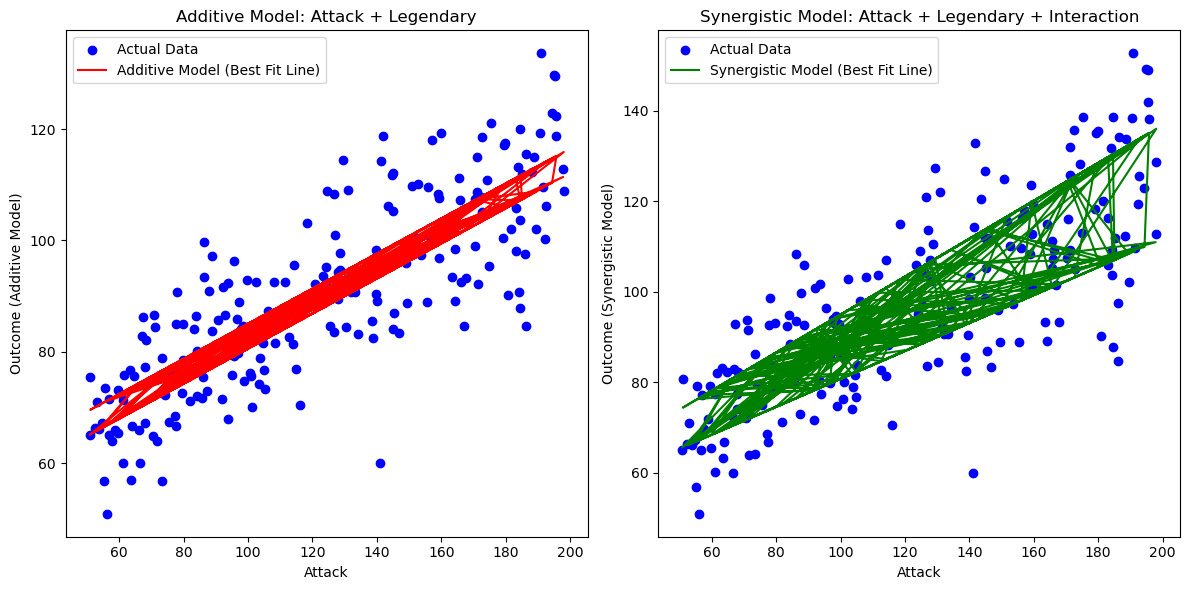

Additive Model Summary:
                            OLS Regression Results                            
Dep. Variable:       Outcome_Additive   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     205.8
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           5.57e-49
Time:                        02:00:49   Log-Likelihood:                -738.57
No. Observations:                 200   AIC:                             1483.
Df Residuals:                     197   BIC:                             1493.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.0505      2

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Simulating some data
np.random.seed(42)

# Simulate a continuous variable 'Attack' (e.g., ranging from 50 to 200)
n = 200
attack = np.random.uniform(50, 200, n)

# Simulate a binary variable 'Legendary' (0 = non-Legendary, 1 = Legendary)
legendary = np.random.choice([0, 1], size=n)

# Simulate noise (random errors) for the regression model
noise = np.random.normal(0, 10, n)

# Simulate the outcome variable with some random coefficients
# For the additive model: Outcome = 50 + 0.3*Attack + 5*Legendary + noise
outcome_additive = 50 + 0.3 * attack + 5 * legendary + noise

# Synergistic model (with interaction): Outcome = 50 + 0.3*Attack + 5*Legendary + 0.1*Attack*Legendary + noise
outcome_synergistic = 50 + 0.3 * attack + 5 * legendary + 0.1 * attack * legendary + noise

# Create a DataFrame
data = pd.DataFrame({
    'Attack': attack,
    'Legendary': legendary,
    'Outcome_Additive': outcome_additive,
    'Outcome_Synergistic': outcome_synergistic
})

# Add a constant to the model for the intercept
X_additive = sm.add_constant(data[['Attack', 'Legendary']])

# Explicitly create the interaction term for the synergistic model
data['Attack_Legendary'] = data['Attack'] * data['Legendary']
X_synergistic = sm.add_constant(data[['Attack', 'Legendary', 'Attack_Legendary']])

# Fit additive linear regression model
model_additive = sm.OLS(data['Outcome_Additive'], X_additive).fit()

# Fit synergistic linear regression model
model_synergistic = sm.OLS(data['Outcome_Synergistic'], X_synergistic).fit()

# Predictions from both models
pred_additive = model_additive.predict(X_additive)
pred_synergistic = model_synergistic.predict(X_synergistic)

# Plotting
plt.figure(figsize=(12, 6))

# Additive Model
plt.subplot(1, 2, 1)
plt.scatter(data['Attack'], data['Outcome_Additive'], color='blue', label='Actual Data')
plt.plot(data['Attack'], pred_additive, color='red', label='Additive Model (Best Fit Line)')
plt.xlabel('Attack')
plt.ylabel('Outcome (Additive Model)')
plt.title('Additive Model: Attack + Legendary')
plt.legend()

# Synergistic Model
plt.subplot(1, 2, 2)
plt.scatter(data['Attack'], data['Outcome_Synergistic'], color='blue', label='Actual Data')
plt.plot(data['Attack'], pred_synergistic, color='green', label='Synergistic Model (Best Fit Line)')
plt.xlabel('Attack')
plt.ylabel('Outcome (Synergistic Model)')
plt.title('Synergistic Model: Attack + Legendary + Interaction')
plt.legend()

plt.tight_layout()
plt.show()

# Print out model summaries
print("Additive Model Summary:")
print(model_additive.summary())
print("\nSynergistic Model Summary:")
print(model_synergistic.summary())


QUESTION 4)

In [23]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        02:02:13   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

QUESTION 4 INTERPRETATION)

The low value of R^2 (17.6%) means that the model only explains 17.6% of the data's variation, suggesting that it is not a good model/predictor of the outcome variable.  While each individual predictor variable's coefficient may have a large value, suggesting a very strong correlation with the outcome variable, when looking at all these variables at once, they do a terrible job explaining the variation in the data.  Many of these coefficients also have p-values that suggest very strong evidence against the null hypothesis (no effect), which again suggests that there is a strong correlation between their input variable and the predictor variable.  However, the model AS A WHOLE does a bad job of predicting the outcome variable's value. 

ChatGPT Links/Summaries for Pre-Lecture Questions

Question 1: https://chatgpt.com/share/672ec47c-3488-800c-9658-460b3a550e0f

"In this chat, we discussed the concept of using indicator variables (or dummy variables) in multiple linear regression to represent non-binary categorical variables. Here's a summary:

Model Setup:

A categorical variable with 
𝑘
k categories is converted into 
𝑘
−
1
k−1 indicator variables.
The regression equation models the relationship between the outcome 
𝑦
y and the indicator variables, with the baseline category (the one not represented by an indicator) as the reference.
Equation: The general regression equation is:

𝑦 = 
𝛽
0
+
𝛽
1
𝑥
1
+
𝛽
2
𝑥
2
+
⋯
+
𝛽
𝑘
−
1
𝑥
𝑘
−
1
+
𝜖
y=β 
0
​
 +β 
1
​
 x 
1
​
 +β 
2
​
 x 
2
​
 +⋯+β 
k−1
​
 x 
k−1
​
 +ϵ
where 
𝛽
0
β 
0
​
  represents the expected value of 
𝑦
y for the baseline category, and 
𝛽
1
,
𝛽
2
,
…
,
𝛽
𝑘
−
1
β 
1
​
 ,β 
2
​
 ,…,β 
k−1
​
  are the differences in 
𝑦
y between the respective categories and the baseline.

Interpretation:

Each indicator variable is coded as 1 if the observation belongs to the corresponding category and 0 otherwise.
For each observation, only one indicator variable is 1, so the equation simplifies to just the intercept plus the coefficient for the active category.
This setup allows the model to estimate the differences in the outcome across categories while avoiding multicollinearity by omitting one category as the reference."

Question 3: https://chatgpt.com/share/672ec4e5-7328-800c-a1de-5a07a47e37a7

"In this chat, you asked for help visualizing data and creating models with continuous and binary predictors using regression. Here’s a summary of our discussion:

Context: You initially worked on logistic regression with a dataset, where the dependent variable was a binary outcome (str8fyre), and independent variables included Attack, Legendary, and other factors. You wanted to visualize the models' best fit lines using Plotly.

Issue with Logistic Regression: You recognized that logistic regression (due to the log odds) would complicate drawing "best fit lines." So, we shifted to treating the problem as multivariate linear regression for simplicity, pretending the model's coefficients applied to continuous and binary predictors.

Simulating Data: We simulated data with:

A continuous variable Attack (ranging from 50 to 200).
A binary variable Legendary (0 or 1).
An outcome variable generated from both a linear and interaction term.
Linear Models: We created two types of models:

Additive Model: Outcome = 50 + 0.3*Attack + 5*Legendary + noise.
Synergistic Model: Outcome = 50 + 0.3*Attack + 5*Legendary + 0.1*Attack*Legendary + noise.
Regression: We fit both an additive and synergistic linear regression model using statsmodels, adding the necessary interaction term for the synergistic model.

Visualization: We plotted the data along with the best fit lines for both models. The Additive Model showed a linear relationship between Attack and Outcome, while the Synergistic Model illustrated how the relationship was modified by the interaction of Attack and Legendary.

Outcome: The models were compared, and visualized, and summaries were provided showing the regression coefficients and fit statistics.

In summary, you were able to generate and visualize regression lines for both additive and synergistic models, while handling data and interactions appropriately, even though the original context was logistic regression."

Question 4: https://chatgpt.com/share/672ec513-21a8-800c-aa0f-55ee167afdf7

"The discussion highlights a contradiction between a low R² value (17.6%) and significant individual predictor variables. The low R² suggests the model explains only a small portion of the outcome's variation, making it a poor predictor overall. However, large coefficients with strong statistical significance indicate that each individual predictor has a strong relationship with the outcome. This suggests that while individual predictors are important, the model as a whole does a poor job of explaining the outcome due to factors like multicollinearity, model specification, or unaccounted-for variables."

POST-LECTURE QUESTIONS

QUESTION 5)

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url)

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


This code replaces the missing values with 'None,' then splits the data set into two equal sized data sets, a "training" set and a "testing" set.  It sets a random seed to make sure that each time the code is run, it produces the same result.  The code displays the training data set in the table.

In [11]:
import statsmodels.formula.api as smf

model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        03:06:03   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This code calculates statistics such as the R-squared and p-value for this linear regression model, which uses attack and defence to predict HP.  It states that the R-squared is 0.148, which means the model explains 14.8% of the variability of HP, but that the p-value is 0.000, which means that we reject the null hypothesis of no effect with very strong evidence.

In [12]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


This compares the R-squared values for the test sample and the training sample of the data.  Its results show that the 14.8% of the variance in HP for the training data is explained by the model, while 21.2% of the variance in HP for the test data is explained by the model.

In [13]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        03:12:13   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

This code tests a new multiple linear regression model, which uses Attack, Defence, Speed, whether a Pokemon is Legendary, as well as Sp. Def and Sp. Atk to predict HP.  It calculates the R-squared, which says that 46.7% of the variance in HP is explained by this model, and calculates the p-values for the whole model (0.000 - very strong evidence against null hypothesis of no effect) as well as for each of the predictor variables.

In [14]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


Like the other code above, this compares the R-squared calculated with this model for the training data (0.467) and the test data (0.002).  This means the model explains 46.7% of the variance in HP for the training data, but only 0.2% of the data for the test data.

This means this model only fits the training data, and does not work when used on other data.  It is too specific/not generalizable enough.

QUESTION 6)

code:

In [15]:
# "Cond. No." WAS 343.0 WITHOUT to centering and scaling
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        03:23:32   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()
# "Cond. No." is NOW 1.66 due to centering and scaling

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        03:23:39   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 69.3025      1.186     58.439      0.000      66.971      71.634
scale(center(Attack))      8.1099      1.340      6.051      0.000       5.475      10.745
scale(center(Defense))     2.9496      1.340      2.201      0.028       0.315       5.585
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model4_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Defense))'
model4_linear_form_CS += ' * scale(center(Speed)) * Legendary' 
model4_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# Legendary is an indicator, so we don't center and scale that

model4_CS_spec = smf.ols(formula=model4_linear_form_CS, data=pokeaman_train)
model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Cond. No. is 2,250,000,000,000,000

# The condition number is still bad even after centering and scaling

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.663
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.54e+16


In [18]:
# Just as the condition number was very bad to start with
model4_fit.summary().tables[-1]  # Cond. No. is 12,000,000,000,000,000

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.664
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.20e+16


Question 6 explanation:

model4_linear_form creates new predictor variables by multiplying different columns/variables from the original data with each other.  This means the new variables are too reliant on each other, rather than the original data, and it is difficult to tell which variables are actually well-correlated with the data.  This means the model works very well for this specific data set, since we created it for this purpose, but when generalized to other data sets, it doesn't predict the outcome variable's value well, due to its high multicollinearity.

QUESTION 7)

Code:

In [19]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     4.948
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           9.48e-19
Time:                        03:32:03   Log-Likelihood:                -1765.0
No. Observations:                 400   AIC:                             3624.
Df Residuals:                     353   BIC:                             3812.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.1046     14.957      0.676      0.500     -19.312      39.521
Legendary[T.True]             -3.2717      4.943     -0.662      0.508     -12.992       6.449
C(Generation)[T.2]             9.2938      4.015      2.315      0.021       1.398      17.189
C(Generation)[T.3]             2.3150      3.915      0.591      0.555      -5.385      10.015
C(Generation)[T.4]             4.8353      4.149      1.165      0.245      -3.325      12.995
C(Generation)[T.5]            11.4838      3.960      2.900      0.004       3.696      19.272
C(Generation)[T.6]             4.9206      4.746      1.037      0.300      -4.413      14.254
C(Q("Type 1"))[T.Dark]        -1.4155      6.936     -0.204      0.838     -15.057      12.226
C(Q("Type 1"))[T.Dragon]       0.8509      6.900      0.123      0.902     -12.720      14.422
C(Q("Type 1"))[T.Electric]    -6.3641      6.537     -0.974      0.331     -19.220       6.491
C(Q("Type 1"))[T.Fairy]       -1.9486     10.124     -0.192      0.847     -21.859      17.962
C(Q("Type 1"))[T.Fighting]     7.0308      7.432      0.946      0.345      -7.586      21.648
C(Q("Type 1"))[T.Fire]         3.0779      6.677      0.461      0.645     -10.055      16.210
C(Q("Type 1"))[T.Flying]      -2.1231     22.322     -0.095      0.924     -46.025      41.779
C(Q("Type 1"))[T.Ghost]        5.7343      8.488      0.676      0.500     -10.960      22.429
C(Q("Type 1"))[T.Grass]        3.3275      5.496      0.605      0.545      -7.481      14.136
C(Q("Type 1"))[T.Ground]       9.5118      7.076      1.344      0.180      -4.404      23.428
C(Q("Type 1"))[T.Ice]         -0.9313      7.717     -0.121      0.904     -16.108      14.246
C(Q("Type 1"))[T.Normal]      18.4816      5.312      3.479      0.001       8.034      28.929
C(Q("Type 1"))[T.Poison]       8.3411      7.735      1.078      0.282      -6.871      23.554
C(Q("Type 1"))[T.Psychic]      1.8061      6.164      0.293      0.770     -10.317      13.930
C(Q("Type 1"))[T.Rock]        -3.8558      6.503     -0.593      0.554     -16.645       8.933
C(Q("Type 1"))[T.Steel]       -4.0053      8.044     -0.498      0.619     -19.826      11.816
C(Q("Type 1"))[T.Water]        9.7988      5.166      1.897      0.059      -0.361      19.959
C(Q("Type 2"))[T.Dark]         5.8719     15.185      0.387      0.699     -23.993      35.737
C(Q("Type 2"))[T.Dragon]      13.2777     14.895      0.891      0.373     -16.016      42.571
C(Q("Type 2"))[T.Electric]    14.3228     17.314      0.827      0.409     -19.728      48.374
C(Q("Type 2"))[T.Fairy]        2.8426     14.268      0.199      0.842     -25.218      30.903
C(Q("Type 2"))[T.Fighting]     1.9741     14.089      0.140      0.889     -25.735      29.683
C(Q("Type 2"))[T.Fire]         0.2001     1

In [21]:
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215


In [22]:
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     24.36
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           2.25e-30
Time:                        03:38:37   Log-Likelihood:                -1783.6
No. Observations:                 400   AIC:                             3585.
Df Residuals:                     391   BIC:                             3621.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             22.8587      3.876      5.897      0.000      15.238      30.479
I(Q("Type 1") == "Normal")[T.True]    17.5594      3.339      5.258      0.000      10.994      24.125
I(Q("Type 1") == "Water")[T.True]      9.0301      3.172      2.847      0.005       2.794      15.266
I(Generation == 2)[T.True]             6.5293      2.949      2.214      0.027       0.732      12.327
I(Generation == 5)[T.True]             8.4406      2.711      3.114      0.002       3.112      13.770
Attack                                 0.2454      0.037      6.639      0.000       0.173       0.318
Speed                                 -0.1370      0.045     -3.028      0.003      -0.226      -0.048
Q("Sp. Def")                           0.3002      0.045      6.662      0.000       0.212       0.389
Q("Sp. Atk")                           0.1192      0.042      2.828      0.005       0.036       0.202
==============================================================================
Omnibus:                      271.290   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4238.692
Skew:                           2.651   Prob(JB):                         0.00
Kurtosis:                      18.040   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)

'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933


In [24]:
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     12.16
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.20e-29
Time:                        03:39:27   Log-Likelihood:                -1769.5
No. Observations:                 400   AIC:                             3579.
Df Residuals:                     380   BIC:                             3659.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 95.1698     34.781      2.736      0.007      26.783     163.556
I(Q("Type 1") == "Normal")[T.True]        18.3653      3.373      5.445      0.000      11.733      24.997
I(Q("Type 1") == "Water")[T.True]          9.2913      3.140      2.959      0.003       3.117      15.466
I(Generation == 2)[T.True]                 7.0711      2.950      2.397      0.017       1.271      12.871
I(Generation == 5)[T.True]                 7.8557      2.687      2.923      0.004       2.572      13.140
Attack                                    -0.6975      0.458     -1.523      0.129      -1.598       0.203
Speed                                     -1.8147      0.554     -3.274      0.001      -2.905      -0.725
Attack:Speed                               0.0189      0.007      2.882      0.004       0.006       0.032
Q("Sp. Def")                              -0.5532      0.546     -1.013      0.312      -1.627       0.521
Attack:Q("Sp. Def")                        0.0090      0.007      1.311      0.191      -0.004       0.023
Speed:Q("Sp. Def")                         0.0208      0.008      2.571      0.011       0.005       0.037
Attack:Speed:Q("Sp. Def")                 -0.0002   9.06e-05     -2.277      0.023      -0.000   -2.82e-05
Q("Sp. Atk")                              -0.7277      0.506     -1.439      0.151      -1.722       0.267
Attack:Q("Sp. Atk")                        0.0136      0.005      2.682      0.008       0.004       0.024
Speed:Q("Sp. Atk")                         0.0146      0.007      2.139      0.033       0.001       0.028
Attack:Speed:Q("Sp. Atk")                 -0.0002    5.4e-05     -3.383      0.001      -0.000   -7.65e-05
Q("Sp. Def"):Q("Sp. Atk")                  0.0103      0.007      1.516      0.130      -0.003       0.024
Attack:Q("Sp. Def"):Q("Sp. Atk")          -0.0001   6.71e-05     -2.119      0.035      -0.000   -1.03e-05
Speed:Q("Sp. Def"):Q("Sp. Atk")           -0.0002   8.82e-05     -2.075      0.039      -0.000   -9.62e-06
Attack:Speed:Q("Sp. Def"):Q("Sp. Atk")   2.03e-06   7.42e-07      2.734      0.007     5.7e-07    3.49e-06
==============================================================================
Omnibus:                      252.300   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3474.611
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                      16.590   Cond. No.                     2.34e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+09. Thi

In [25]:
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)

'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


In [29]:
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,15.4


In [27]:
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


QUESTION 7 EXPLANATION / INTERPRETATION)

Model 5 is simpler than Model 4, since it does not include any interactions, but is still much more complex than Model 3, which contains only two variables (attack and defence, with no interactions).  Model 5, on the other hand, contains many variables.  This means that Model 3 has the lowest multicollinearity, making it the most generalizable, with Model 4 being the least, and Model 5 in between.  However, on the flip side, this means that Model 3 is the least complex, and therefore may not be the most accurate predictor, while Model 4 is the most complex, and therefore, in theory, the best at predicting the outcome.  Again, Model 5 is in between Model 3 and 4 in terms of complexity.

Model 5 calculated the p-value for many predictor variables, and Model 6 takes these values, and only includes those with a statistically significant p-value of 0.05 or less.  It ends up consisting of 8 variables, but does not include any interactions between them.  It has a lower cond. number than Model 5, which is good, but it also has slightly lower values of R-squared for both in and out of sample data (0.392 vs 0.333 for in-sample, and 0.300 vs 0.296 for out-of sample).

Model 7 includes the same 8 variables as Model 6, but includes an interaction between 4 of them and then adds the other 4, rather than just adding all 8.  At first, this leads to a VERY high cond number, but after scaling and centering the interaction (but not the other 4 variables), the cond number is down to 15.4, which is quite good.  It has an R-squared value for in-sample data that is slightly lower than Model 5's (0.378 vs 0.392), but an out-of-sample R-squared value that is higher than Model 5's (0.351 vs 0.300), suggesting that it is more generalizable and likely a better predictive model than Model 5 is.

QUESTION 8)

In [20]:
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url).fillna('None')

# Define all possible categories to avoid mismatches
pokeaman['Type 1'] = pd.Categorical(pokeaman['Type 1'], 
                                    categories=pokeaman['Type 1'].unique())
pokeaman['Type 2'] = pd.Categorical(pokeaman['Type 2'], 
                                    categories=pokeaman['Type 2'].unique())

# Define 50-50 train-test split
fifty_fifty_split_size = int(pokeaman.shape[0] * 0.5)

# Formula for the linear model
linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

# Perform repeated evaluations
reps = 100
in_sample_Rsquared = np.zeros(reps)
out_of_sample_Rsquared = np.zeros(reps)

for i in range(reps):
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=fifty_fifty_split_size)
    
    # Fit model on training data
    final_model_fit = smf.ols(formula=linear_form, data=pokeaman_train).fit()
    
    # Store in-sample R-squared
    in_sample_Rsquared[i] = final_model_fit.rsquared
    
    # Calculate out-of-sample R-squared
    predictions = final_model_fit.predict(pokeaman_test)
    out_of_sample_Rsquared[i] = np.corrcoef(pokeaman_test['HP'], predictions)[0, 1] ** 2

# Plot results
df = pd.DataFrame({
    "In Sample Performance (Rsquared)": in_sample_Rsquared,
    "Out of Sample Performance (Rsquared)": out_of_sample_Rsquared
})
fig = px.scatter(df, x="In Sample Performance (Rsquared)", y="Out of Sample Performance (Rsquared)")
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], name="y=x", line_shape='linear'))
fig.show()


This code calculates and displays the relationship between in-sample and out-of-sample R-squared values for various predictor variables, and combinations of predictor variables.  It is a mostly linear pattern, with a negative slope.  This suggests that as in-sample R-squared value increases, out-of-sample R-squared value decreases.  This is likely due to overfitting, as models that work very well for the in-sample data, and therefore have a high R-squared value are likely overfitted, and don't do a good job of predicting outcome variable's value when applied to data other than the original data set they were developped on.

QUESTION 9)

Code:

In [26]:
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
yhat_model7 = model7_fit.predict(pokeaman_test)

model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.39663388999251414 (original)
'Out of sample' R-squared: 0.30316591092049655 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)


In [27]:
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.39663388999251414 (original)
'Out of sample' R-squared: 0.30316591092049655 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)


In [30]:
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

yhat_model6 = model6_fit.predict(pokeaman_test)

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()

model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.3375383168786178 (original)
'Out of sample' R-squared: 0.3083727950829356 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)


In [31]:
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.3375383168786178 (original)
'Out of sample' R-squared: 0.3083727950829356 (original)
'In sample' R-squared:     0.33517279824114776 (gen1to5_predict_future)
'Out of sample' R-squared: 0.26262690178799936 (gen1to5_predict_future)


QUESTION 9 EXPLANATION)

The first box of code here separates the data into two groups, Gen 1 and all other generations of pokemon, and then uses Model 7 to calculate the R-squared value for the data, both in-sample (gen 1) and out of sample (all other gens).  It finds that using only Gen 1 as training data is a good predictor of HP for Generation 1 Pokemon.  However, it is not very effective when used to predict the HP values for future generations (2-6) - its R-squared is only 0.112, compared to 0.303 for the original Model 7.

However, when using Model 7 with training data from Generation 1-5 (the second box of code) to predict the HP for Pokemon in Generation 6, the results are much better, though still not as good as the original Model 7's results (R-squared of 0.23 compared to 0.30 for the original model).

Similarly, the third box of code does the same as the first box, but uses Model 6 as the base instead of Model 7.  It is also better at predicting HP values for Gen 1 Pokemon than the original model (R-squared of 0.44 vs 0.34), but is again worse at predicting the out-of-sample R-squared (for Pokemon in future Generations), with a low R-squared of 0.193 (again compared to 0.31 for model 6 originally).

The 4th box of code also uses Model 6, but with in-sample / training data from Generations 1-5, not just Gen 1.  This does a better job of predicting the HP value for future generations, just as Model 7 did when we did the same thing to it (in the 2nd box of code).  However, it's still not as good a predictor as the original model 6 (which includes all generations in its training data) at predicting the HP values of Gen 6 pokemon, which are the out-of-sample data in this case (out-of-sample R-squared of 0.26, while the orginal model 6's out-of-sample R-squared was 0.31).

This illustrates that it is best to use training data that is representative of the entire data set, since when we included only Gen 1, the model was worse at predicting than when we used Gens 1-5, which was again a worse predictive model than when we used all Generations (1-6).  While the model can still be pretty good when we don't include a representative sample of training data (the model in the 4th box of code above is almost as good as the original model), we will still always have a better predictive model when using good training data.  This is because when we limit the training data, it is easier to overfit the model, making it useless when applied to other data.

ChatGPT links / summaries:


Question 5: https://chatgpt.com/share/6733e1de-560c-800c-8cc0-c827d9f61f2e
"In this chat, we discussed the following:

Model Interpretation: You asked about interpreting a linear regression model's R-squared and p-values. The in-sample R-squared was 14.8%, indicating how much of the variance in HP the model explains on the training data, and the p-value showed strong evidence that the predictors have an effect on HP.

Random Seed: We clarified that setting a random seed (e.g., 130) ensures that the random processes (like data splitting) are reproducible, so the same results occur each time the code runs.

Code Review: We reviewed the creation of a new multiple linear regression model with a complex interaction structure, predicting HP using several predictors. You correctly interpreted that the model explained 46.7% of the variance in HP for the training data, and the p-value indicated strong evidence against the null hypothesis.

Q Function: The Q function in the regression formula was explained as a way to handle column names with special characters or spaces, ensuring they’re interpreted correctly.

R-squared Comparison: We discussed comparing the in-sample and out-of-sample R-squared values. While the in-sample R-squared was 46.7%, the out-of-sample R-squared was only 0.2%, suggesting the model may be overfitting the training data and not generalizing well to the test data.

Spelling: The correct spelling of "generalizable" was confirmed."


Question 6: https://chatgpt.com/share/6733e1f5-b22c-800c-8f56-a3d805b88f79
"In this chat, we discussed how the linear form specification of a model (like model4_linear_form) creates new predictor variables by transforming the original data, often by multiplying or combining variables (e.g., interaction terms or polynomial terms). These new variables are included as columns in the design matrix (model4_spec.exog), which is used to predict the outcome variable (model4_spec.endog).

We also covered how multicollinearity can arise when these new variables are highly correlated with each other, making it difficult to separate their individual effects on the outcome. This can lead to overfitting, where the model performs well on the training data but struggles to generalize to new, unseen data. High multicollinearity reduces the model's ability to make accurate "out of sample" predictions.

In summary, while the model may fit the training data very well, it can perform poorly on new data due to the high multicollinearity between predictors, making the model too reliant on the specific dataset it was trained on."


Question 7: https://chatgpt.com/share/6733e236-6b80-800c-bd7c-8a3c49084b50
"In this chat, we discussed and compared several models for predicting the variable HP using different sets of predictors and interactions.

Model 5: Includes 9 variables, capturing both significant and non-significant predictors, leading to a higher in-sample R-squared (0.392) but a higher condition number, indicating potential multicollinearity. It is likely prone to overfitting but performs well on training data.

Model 6: Reduces complexity by removing non-significant predictors (p-value > 0.05) and includes only statistically significant variables. This reduces the condition number, improving model stability and generalization. It has slightly lower in-sample R-squared (0.333) but similar out-of-sample performance (0.296 vs. 0.300), making it more generalizable than Model 5.

Model 7: Includes the same 8 variables as Model 6 but adds interactions between 4 of them, which initially leads to a high condition number. After scaling and centering the interaction terms, the condition number drops to 15.4, indicating a much more stable model. The in-sample R-squared (0.378) is slightly lower than Model 5's, but the out-of-sample R-squared (0.351) is higher, suggesting that Model 7 is more generalizable and likely a better predictive model than Model 5.

In summary, Model 6 and Model 7 are more stable and generalizable compared to Model 5. While Model 5 is more complex and overfits the data, Model 6 simplifies the model for better generalization, and Model 7 further improves generalizability by incorporating interactions without significantly increasing multicollinearity."


Question 8: https://chatgpt.com/share/6733e262-eed8-800c-97b9-4295a5978b5d
"In this chat, we discussed an analysis involving a Pokémon dataset and linear regression models. The user encountered issues with categorical variables, particularly related to "Type 1" and "Type 2" columns, during model fitting. The error arose from mismatched or unexpected levels when attempting to encode categorical data for use in regression models.

We explored the process of building a model, splitting the data into training and testing sets, and running simulations to calculate in-sample and out-of-sample 
𝑅
2
R 
2
  values. The user observed a negative relationship between in-sample and out-of-sample 
𝑅
2
R 
2
 , suggesting overfitting. This insight led to the conclusion that models with higher in-sample performance may perform poorly on new data due to overfitting.

The user also asked for clarification on the interpretation of the results, and we refined the explanation to clarify the connection between overfitting and the observed trend in the scatterplot."


Question 9: https://chatgpt.com/share/6733e27e-35cc-800c-8fdb-4390c3154f32
"In this chat, we discussed the evaluation of predictive models for Pokémon HP data, focusing on how training data from different generations impacts model performance. The code compares in-sample and out-of-sample 
𝑅
2
R 
2
  values for models trained on various subsets of data:

Model 7 trained on Generation 1 performs well for Generation 1 but poorly predicts future generations (low out-of-sample 
𝑅
2
R 
2
 ).
Model 7 trained on Generations 1-5 improves out-of-sample predictions for Generation 6, though still not as well as the original model.
Model 6 trained on Generation 1 shows similar results—good in-sample fit but weak out-of-sample performance.
Model 6 trained on Generations 1-5 again improves out-of-sample predictions for Generation 6 but does not outperform the original model.
The key takeaway is that models trained on more representative data (e.g., Generations 1-5) tend to generalize better, avoiding overfitting and providing more accurate predictions for future, unseen data."